In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


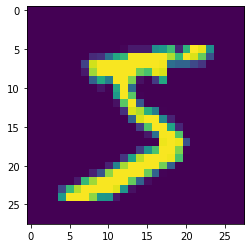

In [23]:
plt.imshow(x_train[0])

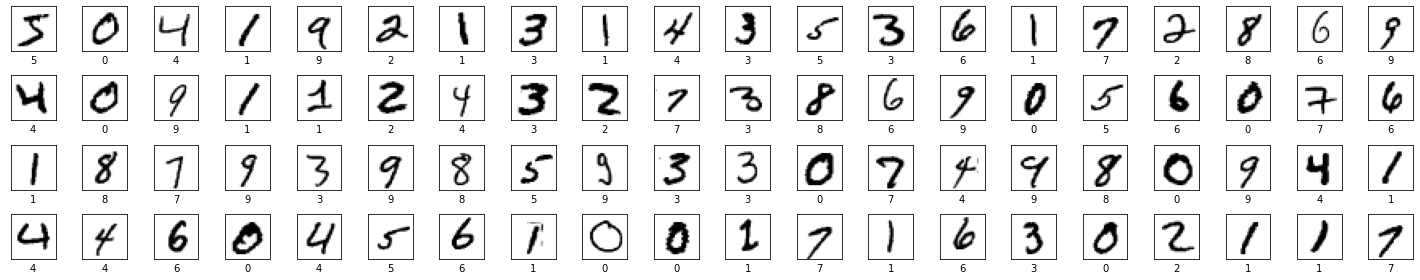

In [24]:
ROWS = 4
COLS = 20
i = 0

plt.figure(figsize=(20,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [25]:

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train,x_test = x_train / 255.0, x_test / 255.0

In [26]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])





In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [28]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.1384 - accuracy: 0.9578 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 2/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0499 - val_accuracy: 0.9849
Epoch 3/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0710 - val_accuracy: 0.9778
Epoch 4/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0414 - val_accuracy: 0.9869
Epoch 5/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.0402 - val_accuracy: 0.9893


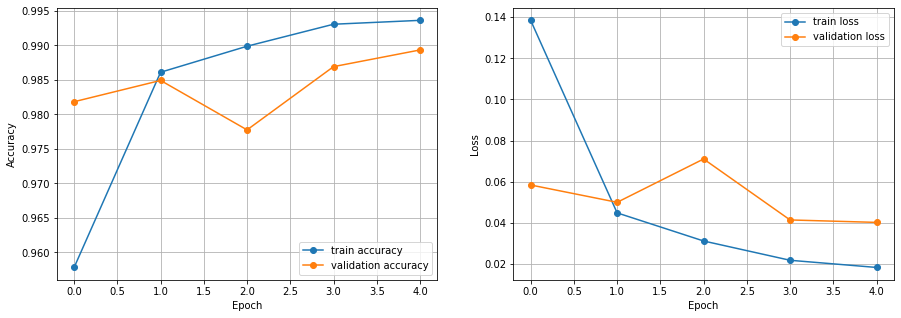

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0350 - accuracy: 0.9904

Test Accuracy: 0.9904000163078308

Test Loss: 0.03502446785569191


In [32]:
predictions = model.predict(x_test)

In [33]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0311 - val_accuracy: 0.9917
Epoch 2/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0313 - val_accuracy: 0.9923
Epoch 3/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0318 - val_accuracy: 0.9924
Epoch 4/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0318 - val_accuracy: 0.9924
Epoch 5/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0315 - val_accuracy: 0.9923


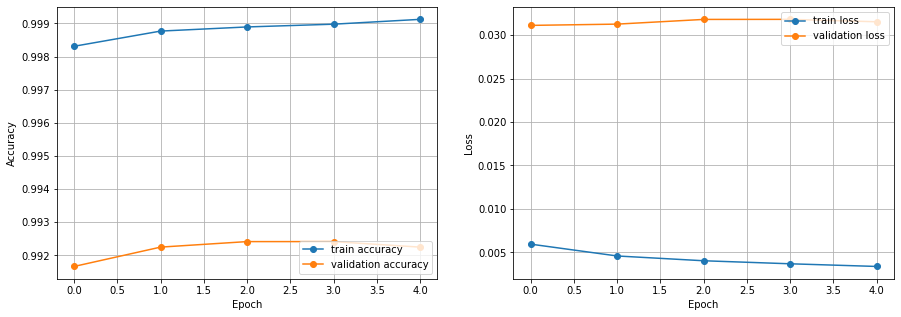

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.0230 - accuracy: 0.9934

Test Accuracy: 0.993399977684021

Test Loss: 0.022973190993070602


In [37]:
model.compile(
   optimizer='RMSProp', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [38]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0360 - val_accuracy: 0.9921
Epoch 2/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.0437 - val_accuracy: 0.9907
Epoch 3/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.0487 - val_accuracy: 0.9923
Epoch 4/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0566 - val_accuracy: 0.9910
Epoch 5/5
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0637 - val_accuracy: 0.9905


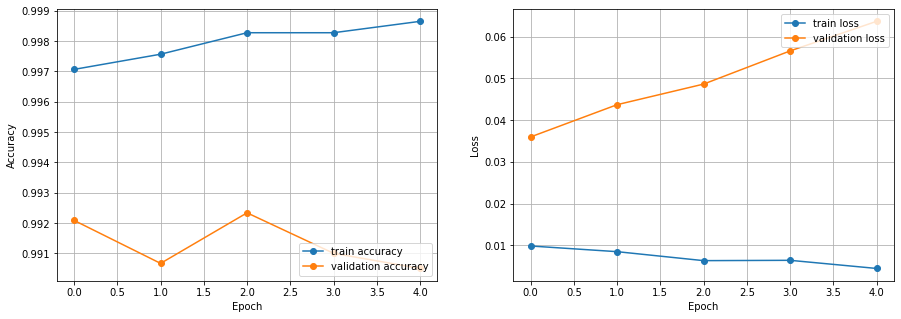

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.0517 - accuracy: 0.9901

Test Accuracy: 0.9901000261306763

Test Loss: 0.0516914427280426
